In [1]:
# Impor Library
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt  
from PIL import Image
import sys
import cv2
from cv2 import aruco
from func import detect_objects

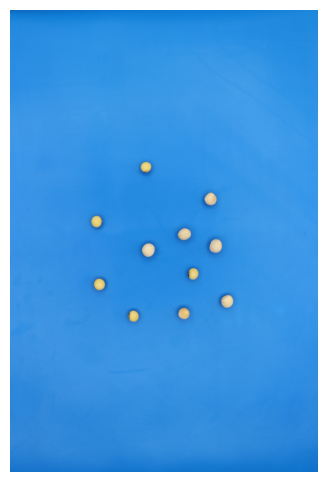

In [5]:
# read the image and view the image
# Import images to view and analyze
img = cv2.imread("IMG_1340.JPG")

# read the image by convert it from BLUE GREEN RED TO RED GREEN BLUE  colors
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display using Matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(img)
plt.axis("off")  # Hide axes
plt.show()

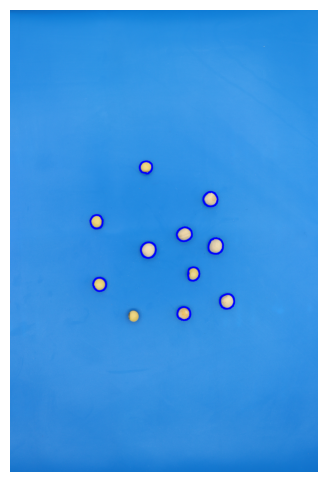

In [7]:
# draw contour around seed
img = cv2.imread("IMG_1340.JPG")
img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
contours = detect_objects(img)

# Draw Contours
for cnt in contours:
    cv2.drawContours(img, [cnt], -1, (0, 0, 255), 10)
    
# Display using Matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(img)
plt.axis("off")  # Hide axes
plt.show()

Number of detected objects: 48


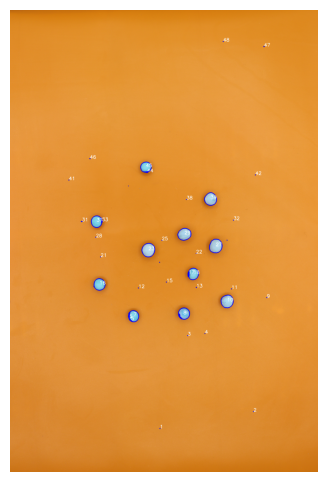

In [9]:
import cv2
import numpy as np

# Load image
img = cv2.imread("IMG_1340.JPG")

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply edge detection
edges = cv2.Canny(gray, 50, 150)

# Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Count number of objects
num_objects = len(contours)
print(f"Number of detected objects: {num_objects}")

# Draw contours and label them
for i, cnt in enumerate(contours):
    cv2.drawContours(img, [cnt], -1, (0, 0, 255), 3)  # Draw contour in red

    # Get object center and label it
    M = cv2.moments(cnt)
    if M["m00"] != 0:  # Prevent division by zero
        cx = int(M["m10"] / M["m00"])
        cy = int(M["m01"] / M["m00"])
        cv2.putText(img, f"{i+1}", (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

# Display using Matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(img)
plt.axis("off")  # Hide axes
plt.show()


Number of detected objects: 11


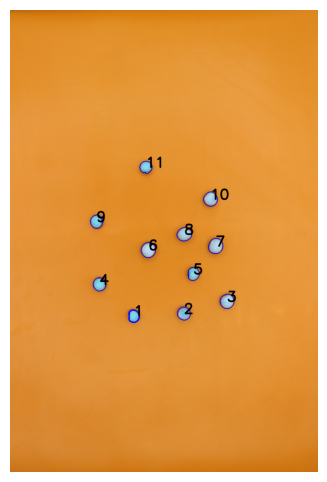

In [18]:
import cv2
import numpy as np

# Load image
img = cv2.imread("IMG_1340.JPG")

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur to reduce noise
blurred = cv2.GaussianBlur(gray, (15, 15), 0)

# Apply Adaptive Thresholding for better segmentation
thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                               cv2.THRESH_BINARY_INV, 11, 2)

# Find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter contours by area (remove very small objects)
filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > 500]  # Adjust 500 based on image

# Count valid objects
num_objects = len(filtered_contours)
print(f"Number of detected objects: {num_objects}")

# Draw filtered contours and label them
for i, cnt in enumerate(filtered_contours):
    cv2.drawContours(img, [cnt], -1, (0, 0, 255), 3)  # Red contours

    # Get object center
    M = cv2.moments(cnt)
    if M["m00"] != 0:  # Prevent division by zero
        cx = int(M["m10"] / M["m00"])
        cy = int(M["m01"] / M["m00"])
        cv2.putText(img, f"{i+1}", (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 3, (0, 0, 0), 10)

# Display using Matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(img)
plt.axis("off")  # Hide axes
plt.show()


Number of detected objects: 20


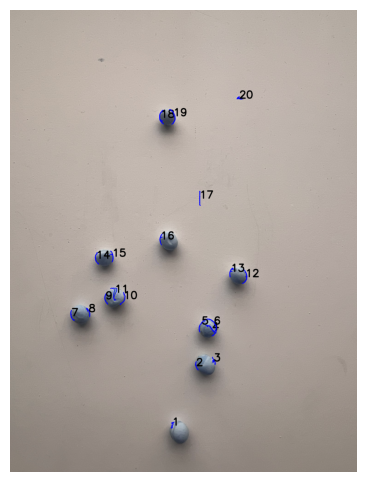

In [32]:
import cv2
import numpy as np

# Load image
img = cv2.imread("IMG_7149.JPG")

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply Adaptive Thresholding for better segmentation
thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                               cv2.THRESH_BINARY_INV, 11, 2)

# Find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter contours by area (remove very small objects)
filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > 300]  # Adjust 500 based on image

# Count valid objects
num_objects = len(filtered_contours)
print(f"Number of detected objects: {num_objects}")

# Draw filtered contours and label them
for i, cnt in enumerate(filtered_contours):
    cv2.drawContours(img, [cnt], -1, (0, 0, 255), 3)  # Red contours

    # Get object center
    M = cv2.moments(cnt)
    if M["m00"] != 0:  # Prevent division by zero
        cx = int(M["m10"] / M["m00"])
        cy = int(M["m01"] / M["m00"])
        cv2.putText(img, f"{i+1}", (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 3, (0, 0, 0), 10)

# Display using Matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(img)
plt.axis("off")  # Hide axes
plt.show()
